## Kalibracija kamere kockom

Matrica kamere: 
 [[ 27.15101 -96.05128 -48.93065 821.01634]
 [ 26.85367  29.19784 -91.81729 590.56963]
 [ -0.0415   -0.03371  -0.05596   1.     ]] 

Matrica kalibracije kamere: 
 [[1186.43552   -6.03654  809.47964]
 [   0.      1188.54531  507.3863 ]
 [   0.         0.         1.     ]] 

Pozicija kamere:
 [6.3711  5.26919 9.97095 1.     ] 

Spoljasnja matrica kamere:
 [[-0.6642  -0.52084  0.53625]
 [ 0.74631 -0.50333  0.43552]
 [ 0.04307  0.68948  0.72302]] 



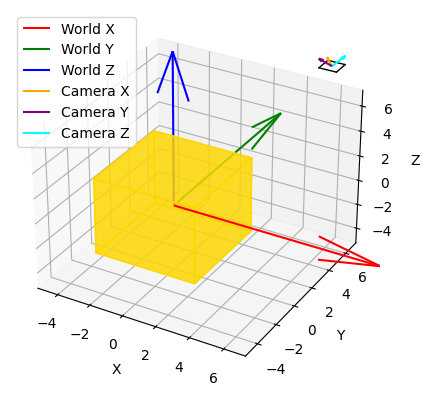

In [51]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math

np.set_printoptions(precision=5, suppress=True)

def sistem(img, org):
    nula = np.array([0, 0, 0, 0])
    x1 = np.array(np.concatenate((nula, -img[2]*org, img[1]*org)))
    x2 = np.array(np.concatenate((img[2]*org, nula, -img[0]*org)))
    return [x1, x2]


def matricaA(imgs, origs):
    A = []
    for i in range(len(imgs)):
        img = imgs[i]
        org = origs[i]
        A.extend(sistem(img, org))
    return A


def matricaKamere(pts2D, pts3D):
    
    A = matricaA(pts2D, pts3D)
    A = np.array(A)

    U, S, V = np.linalg.svd(A)
    T = V[11]
    
    T = T/T[11]
    
    T = T.reshape(3, 4)
    T = np.where(np.isclose(T, 0), 0.0, T)
    return T


def centar(T):
    C1 = np.linalg.det(np.delete(T, 0, 1))
    C2 = np.linalg.det(np.delete(T, 1, 1))
    C3 = np.linalg.det(np.delete(T, 2, 1))
    C4 = np.linalg.det(np.delete(T, 3, 1))
    C = np.array([C1, -C2, C3, -C4])/(-C4)
 
    C = np.where(np.isclose(C, 0) , 0.0 , C)
    return C


def kameraK(T):

    t0 = np.delete(T, 3, 1) # 1- kolona, 0 - vrsta
    # ako je det t0 <0 onda T-> -T
    if np.linalg.det(t0) < 0:
        T = -T
        t0 = np.delete(T, 3, 1)
        
    t0inverz = np.linalg.inv(t0)
    
    # QR dekompozicija t0inverz
    Q, R = np.linalg.qr(t0inverz)

    if(R[0,0] < 0):
        R = np.matmul(np.diag([-1, 1, 1]), R)
        Q = np.matmul(Q, np.diag([-1, 1, 1]))
    if(R[1,1] < 0):
        R = np.matmul(np.diag([1, -1, 1]), R)
        Q = np.matmul(Q, np.diag([1, -1, 1]))
    if(R[2,2] < 0):
        R = np.matmul(np.diag([1, 1, -1]), R)
        Q = np.matmul(Q, np.diag([1, 1, -1]))
        
    K = np.linalg.inv(R)
    K = K / K[2, 2]
 
    K = np.where(np.isclose(K, 0) , 0.0 , K)
    return K


def kameraA(T):
    
    t0 = np.delete(T, 3, 1) # 1- kolona, 0 - vrsta
    if np.linalg.det(t0) < 0:
        T = -T
        t0 = np.delete(T, 3, 1)
        
    t0inverz = np.linalg.inv(t0)
    
    # QR dekompozicija t0inverz
    Q, R = np.linalg.qr(t0inverz)
    if(R[0,0] < 0):
        R = np.matmul(np.diag([-1, 1, 1]), R)
        Q = np.matmul(Q, np.diag([-1, 1, 1]))
    if(R[1,1] < 0):
        R = np.matmul(np.diag([1, -1, 1]), R)
        Q = np.matmul(Q, np.diag([1, -1, 1]))
    if(R[2,2] < 0):
        R = np.matmul(np.diag([1, 1, -1]), R)
        Q = np.matmul(Q, np.diag([1, 1, -1]))
    A = Q
 
    A = np.where(np.isclose(A, 0) , 0.0 , A)
    return A

size = 3
kocka = np.array([[-size, -size, -size],
                        [size, -size, -size],
                        [size, size, -size],
                        [-size, size, -size],
                        [-size, -size, size],
                        [size, -size, size],
                        [size, size, size],
                        [-size, size, size]])

ivice = [[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], [7, 4],
         [0, 4], [1, 5], [2, 6], [3, 7]]

org1 = np.array([1, -1, -1]) * (np.array([1600, 0, 0]) - 
                                np.array([[789, 378, 1], [1073, 554, 1], 
                                          [829, 795, 1], [532, 560, 1], 
                                          [570, 767, 1], [806, 981, 1], 
                                          [1007, 753, 1], [813, 625, 1]]))

imgs1 = np.array([[0, 0, 3, 1], [0, 3, 3, 1], 
                  [3, 3, 3, 1], [3, 0, 3, 1], 
                  [3, 0, 0, 1], [3, 3, 0, 1], 
                  [0, 3, 0, 1], [2, 2, 3, 1]])

T1 = matricaKamere(org1, imgs1)
print("Matrica kamere: \n", T1, "\n")
print("Matrica kalibracije kamere: \n", kameraK(T1), "\n")
print("Pozicija kamere:\n", centar(T1), "\n")
print("Spoljasnja matrica kamere:\n", kameraA(T1), "\n")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

faces = [
    [kocka[0], kocka[1], kocka[2], kocka[3]],  # Bottom face
    [kocka[4], kocka[5], kocka[6], kocka[7]],  # Top face
    [kocka[0], kocka[1], kocka[5], kocka[4]],  # Side face
    [kocka[2], kocka[3], kocka[7], kocka[6]],  # Opposite side face
    [kocka[1], kocka[2], kocka[6], kocka[5]],  # Front face
    [kocka[0], kocka[3], kocka[7], kocka[4]],  # Back face
]

cube = Poly3DCollection(faces, color="gold", alpha=0.6)
ax.add_collection3d(cube)

# World axes
ax.quiver(0, 0, 0, 4*size, 0, 0, color="red", label="World X")
ax.quiver(0, 0, 0, 0, 4*size, 0, color="green", label="World Y")
ax.quiver(0, 0, 0, 0, 0, 4*size, color="blue", label="World Z")

# Camera center
camera_center = centar(T1)
small_size = 0.5
camera_square = small_size * np.array([[-1, -1, 0], [1, -1, 0], [1, 1, 0], [-1, 1, 0]])
camera_square += camera_center[:3]  # Translation
square_edges = [[0, 1], [1, 2], [2, 3], [3, 0]]

# Camera axes
A1 = kameraA(T1)
camera_axes = np.transpose(A1)
for i, color, label in zip(range(3), ["orange", "purple", "cyan"], ["Camera X", "Camera Y", "Camera Z"]):
    ax.quiver(
        camera_center[0], camera_center[1], camera_center[2],
        camera_axes[i, 0], camera_axes[i, 1], camera_axes[i, 2],
        color=color, label=label
    )

# Camera square
for i in range(len(camera_square)):
    p1 = camera_square[i]
    p2 = camera_square[(i + 1) % len(camera_square)]
    ax.plot3D(*zip(p1, p2), color="black", linestyle="solid", linewidth=1)

# Axis limits and labels
ax.set_xlim([-5, 7])
ax.set_ylim([-5, 7])
ax.set_zlim([-5, 7])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()